In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [532]:
test_df=pd.read_csv("Data/Preprocessed/Rockburst_test_data.csv")

In [533]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Energy_Unit_log              19 non-null     float64
 1   Event_freq_unit_per_day_log  19 non-null     float64
 2   Duration_days_log            19 non-null     float64
 3   Energy_per_Volume_log        19 non-null     float64
 4   Energy_density_Joule         19 non-null     float64
 5   Volume_m3                    19 non-null     float64
 6   Energy_Joule_per_day         19 non-null     float64
 7   Volume_m3_per_day            19 non-null     float64
 8   Intensity_Level_encoded      19 non-null     int64  
dtypes: float64(8), int64(1)
memory usage: 1.5 KB


In [534]:
test_df.head()

,Energy_Unit_log,Event_freq_unit_per_day_log,Duration_days_log,Energy_per_Volume_log,Energy_density_Joule,Volume_m3,Energy_Joule_per_day,Volume_m3_per_day,Intensity_Level_encoded
0,2.397895,0.980954,1.945910,1.190380,4.446,4.370,3.668,3.592,1
1,1.386294,0.693147,1.386294,0.589928,4.610,3.732,4.133,3.255,1
2,2.833213,1.299374,1.945910,1.485704,3.621,4.681,2.843,3.903,1
3,2.484907,1.163151,1.791759,1.395086,4.110,3.624,3.411,2.925,3
4,2.944439,1.029619,2.397895,1.561608,5.602,4.779,4.602,3.779,2


In [535]:
train_df=pd.read_csv("Data/Preprocessed/Rockburst_in_Tunnel_V3.csv")

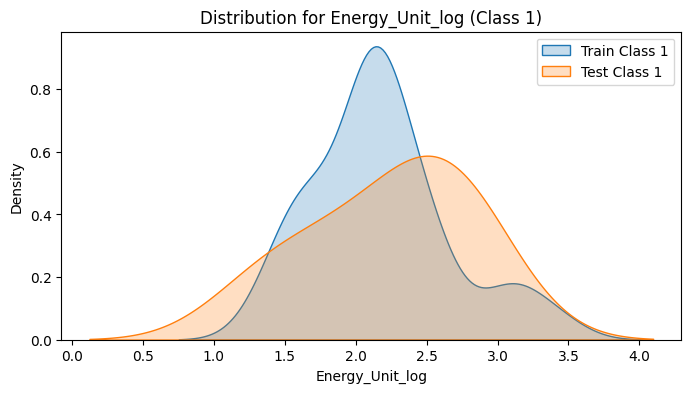

In [536]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = "Energy_Unit_log"  # Example feature
plt.figure(figsize=(8,4))
sns.kdeplot(train_df[train_df["Intensity_Level_encoded"]==1][feature], label="Train Class 1", fill=True)
sns.kdeplot(test_df[test_df["Intensity_Level_encoded"]==1][feature], label="Test Class 1", fill=True)
plt.legend()
plt.title(f"Distribution for {feature} (Class 1)")
plt.show()


In [537]:
model, train_features = joblib.load("trained_models/Log_Regression_model_V3.pkl")
scaler=joblib.load("trained_models/scaler_V3.pkl")
# Ensure test features in same order
X_test = test_df[train_features]  
y_test=test_df["Intensity_Level_encoded"]

X_test_scaled = scaler.transform(X_test)  

In [538]:
y_pred=model.predict(X_test_scaled)


Accuracy: 0.8421
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.62      1.00      0.77         5
           2       1.00      0.80      0.89         5
           3       1.00      0.50      0.67         2

    accuracy                           0.84        19
   macro avg       0.91      0.79      0.81        19
weighted avg       0.90      0.84      0.85        19



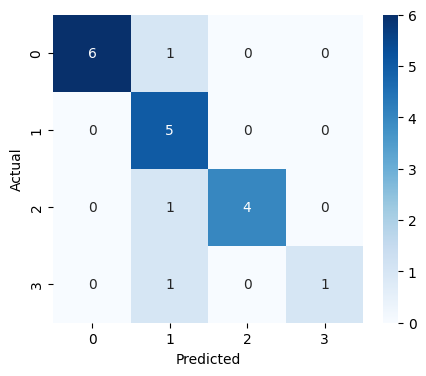

In [539]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc, 4))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [543]:
joblib.dump([model,train_features],"trained_models/Best_model/Log_Reg_model.pkl")

['trained_models/Best_model/Log_Reg_model.pkl']

In [544]:
train_features

['Energy_Unit_log',
 'Event_freq_unit_per_day_log',
 'Duration_days_log',
 'Energy_per_Volume_log',
 'Energy_density_Joule',
 'Volume_m3',
 'Energy_Joule_per_day',
 'Volume_m3_per_day']